In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

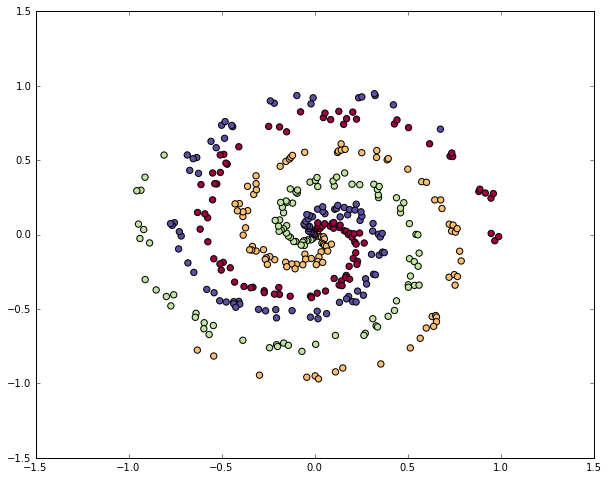

In [20]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 4 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in xrange(K):
    # xindexes for kth training example
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N) # radius
    t = np.linspace(j*8,(j+1)*8,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

# Softmax Linear Classifier

In [21]:
# f = Wx + b
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

In [22]:
# learning rate and regularization
learning_rate = 2e0
reg = 1e-3

In [23]:
# learning or gradient descent loop
num_examples = X.shape[0]
for i in xrange(200):
    # evaluate class scores, [N x K]
    # scores Wx + b
    scores = np.dot(X, W) + b 
    
    # compute the class probabilities
    # normalized_prob = e**xi/ sum(e**xj) for all j
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
    # compute the loss: average cross-entropy loss and regularization
    # Loss = 1/N * sum(Li) + 1/2 * reg * W x W
    #         data loss    +  reg loss
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print "iteration %d: loss %f" % (i, loss)

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples
    
    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    dW += reg*W # regularization gradient
  
    # perform a parameter update
    W += - learning_rate * dW
    b += - learning_rate * db

iteration 0: loss 1.387260
iteration 10: loss 1.354900
iteration 20: loss 1.349228
iteration 30: loss 1.348166
iteration 40: loss 1.347959
iteration 50: loss 1.347918
iteration 60: loss 1.347910
iteration 70: loss 1.347908
iteration 80: loss 1.347908
iteration 90: loss 1.347908
iteration 100: loss 1.347908
iteration 110: loss 1.347908
iteration 120: loss 1.347908
iteration 130: loss 1.347908
iteration 140: loss 1.347908
iteration 150: loss 1.347908
iteration 160: loss 1.347908
iteration 170: loss 1.347908
iteration 180: loss 1.347908
iteration 190: loss 1.347908


In [24]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.33


(-1.9694676421575741, 1.9305323578424294)

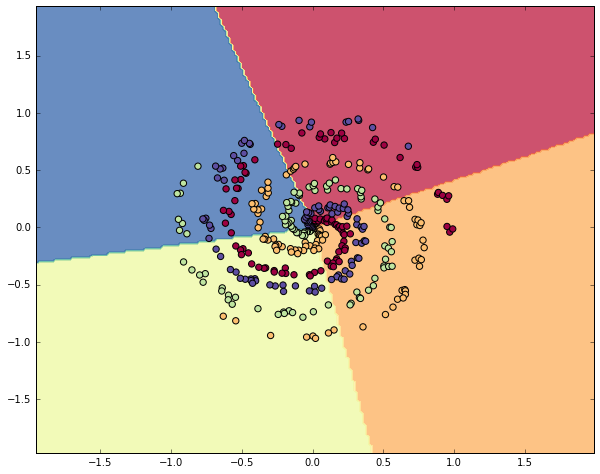

In [25]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')

Softmax classifier fails as data is not linearly separable.

# Neural Network

In [43]:
# initialize parameters randomly
h = 200 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

In [39]:
# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

In [44]:
# same as above softmax function
# just that hiddenlayer with ReLU are extra
# gradient descent loop
num_examples = X.shape[0]
for i in xrange(20000):
  
    # evaluate class scores, [N x K]
    # ReLU = max( 0, XW + b)
    hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
    # scores = Activation * W + b2
    scores = np.dot(hidden_layer, W2) + b2
  
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print "iteration %d: loss %f" % (i, loss)
  
    # compute the gradient on scores
    # delta3
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples
  
    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2 using delta3
    # dW2 = hidden_layer_activation.T * delta3 + reg * W2
    # db2 = delta3
    
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    
    # next backprop into hidden layer
    # delat2 = delta3 * W2.T
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    # dW = X.T * delta2 + reg * W
    # db = delta2
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
    
    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

iteration 0: loss 1.386372
iteration 1000: loss 1.116899
iteration 2000: loss 1.062555
iteration 3000: loss 0.972466
iteration 4000: loss 0.921737
iteration 5000: loss 0.926769
iteration 6000: loss 0.947994
iteration 7000: loss 0.940444
iteration 8000: loss 0.932516
iteration 9000: loss 0.892589
iteration 10000: loss 0.914245
iteration 11000: loss 0.920785
iteration 12000: loss 0.908823
iteration 13000: loss 0.964206
iteration 14000: loss 0.963445
iteration 15000: loss 0.936065
iteration 16000: loss 0.960004
iteration 17000: loss 0.920914
iteration 18000: loss 0.917952
iteration 19000: loss 0.976503


In [45]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.84


(-1.9694676421575741, 1.9305323578424294)

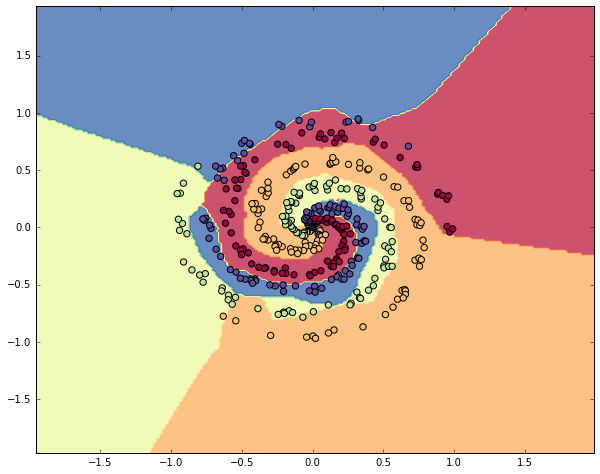

In [46]:

# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')